**0. Import Dependencies**

In [30]:
# yahoo finance api
import yfinance as yf

# change point detection models
import ruptures as rpt

# standard libraries
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# get stock price 
def preprocessing(stock_name='TSLA', period='max'):
    
    '''
    1. Input stock name.
    2. Return historical closing price as list.
    '''

    # assign company
    hist = yf.Ticker(stock_name)

    # get historical stock data
    df = hist.history(period)

    # convert df column to list
    series = list(round(df['Close'], 4))

    return series

**4. Processing Time**

In [6]:
# get stock price of company with longest track record in S&P500 index
series = preprocessing(stock_name='GE', period='max')

In [52]:
# search methods to test

def get_change_points(series, search_method, n_breaks):
    '''
    1. Input list of stock price, search method and number of change points to detect.
    2. Return elapsed time.
    '''
    # convert list to array
    y = np.array(series)
    
    # assign search method and start stopping time
    start = timer()
    model = search_method(model="l1").fit(y)
    
    # detect change points and stop time when finished
    breaks = model.predict(n_bkps=n_breaks-1)
    end = timer()
    
    # document time
    time_delta = round(end - start, 5)
    
    return time_delta

In [13]:
#search_methods = [rpt.Binseg, rpt.BottomUp, rpt.Window, rpt.Dynp]

**Top-Down**

In [ ]:
input_size = []
bottomup_elapsed_time = []

tmp_size = len(series)
starttime = timer()
while tmp_size > 30:
    # incorporate change point number function (e.g. if length 30, then 4 break points) 
    bottomup_elapsed_time.append(get_change_points(series[:tmp_size], search_methods[1], 4))
    input_size.append(tmp_size)
    #print('Computed length ', tmp_size)
    tmp_size -= 1
endtime = timer()
print(endtime-starttime)

**Bottom-Up**

In [ ]:
input_size = []
topdown_elapsed_time = []

tmp_size = len(series)
starttime = timer()
while tmp_size > 30:
    # incorporate change point number function (e.g. if length 30, then 4 break points) 
    topdown_elapsed_time.append(get_change_points(series[:tmp_size], search_methods[0], 4))
    input_size.append(tmp_size)
    #print('Computed length ', tmp_size)
    tmp_size -= 1
endtime = timer()
print(endtime-starttime)

**Window Sliding**

In [ ]:
input_size = []
window_elapsed_time = []

tmp_size = len(series)

starttime = timer()
while tmp_size > 30:
    # incorporate change point number function (e.g. if length 30, then 4 break points) 
    window_elapsed_time.append(get_change_points(series[:tmp_size], search_methods[2], 4))
    input_size.append(tmp_size)
    #print('Computed length ', tmp_size)
    tmp_size -= 1
endtime = timer()
print(endtime-starttime)

In [77]:
# set lists in ascending order 
window_elapsed_time.reverse()
bottomup_elapsed_time.reverse()
topdown_elapsed_time.reverse()
input_size.reverse()

**Plot results**

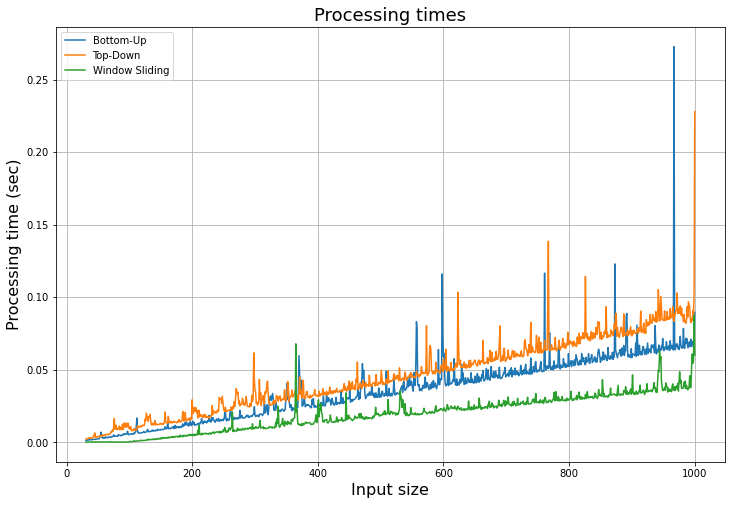

In [78]:
#plt.plot(input_size, elapsed_time)

# Data
df=pd.DataFrame({'Input Size': input_size, 'Bottom-Up': bottomup_elapsed_time, 'Top-Down': topdown_elapsed_time, 'Window Sliding' : window_elapsed_time})

plt.figure(figsize=(12, 8))

# multiple line plots
plt.plot('Input Size', 'Bottom-Up', data=df)
plt.plot('Input Size', 'Top-Down', data=df)
plt.plot('Input Size', 'Window Sliding', data=df)

plt.xlabel('Input size', size=16)
plt.ylabel('Processing time (sec)', size=16)
plt.title('Processing times', size=18)

# show legend
plt.legend()

# show grid
plt.grid()

# show graph
plt.show()

#fig.savefig('test2png.png', dpi=100)